318.3098861837907 1e+06 solMass / kpc2


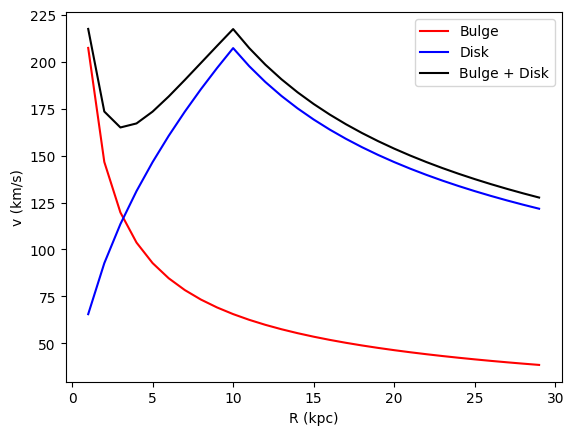

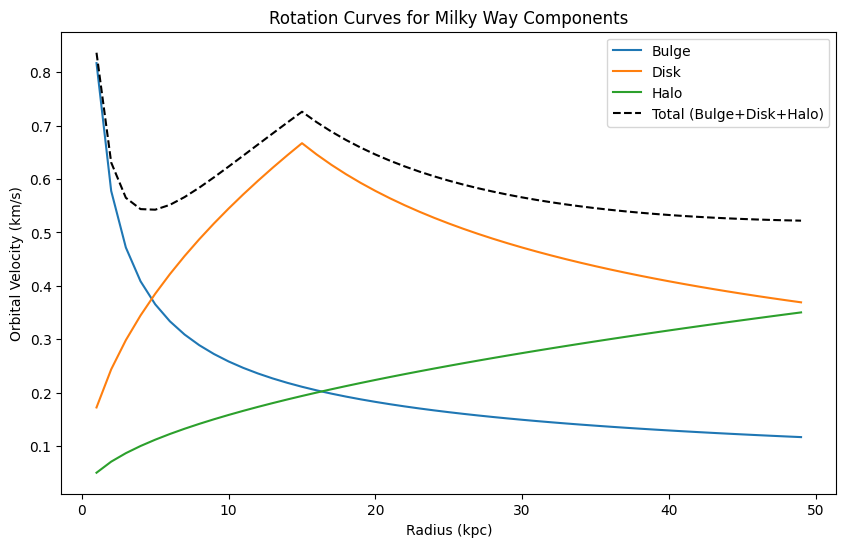

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as ac

def calculate_orbital_velocity(M, R):
    """Calculate the orbital velocity for a given mass and radius."""
    v = np.sqrt(ac.G * M / R)
    return v

# Define parameters
M_bulge = 1e10 * u.solMass
R_arr = np.arange(1, 50) * u.kpc  # Radii array

M_disk = 1e11 * u.solMass
R_disk = 15 * u.kpc
density_disk = M_disk / (np.pi * (R_disk**2))

def calculate_enclosed_mass_for_disk(R, density=density_disk, R_disk=R_disk):
    """Calculate enclosed mass for the disk using a constant density model and array-wise operations."""
    return np.pi * np.minimum(R, R_disk)**2 * density

def calculate_enclosed_mass_for_halo(R, M_halo=1.5e12 * u.solMass, R_halo=200 * u.kpc):
    """Simplified model where mass is proportional to R^2 up to a cutoff."""
    return M_halo * (np.minimum(R, R_halo) / R_halo)**2

def calculate_total_mass(R):
    """Calculate total mass from Bulge, Disk, and Halo."""
    M_bulge_fixed = M_bulge  # Assuming constant bulge mass
    M_disk = calculate_enclosed_mass_for_disk(R)
    M_halo = calculate_enclosed_mass_for_halo(R)
    return M_bulge_fixed + M_disk + M_halo

# Calculate velocities
v_bulge = calculate_orbital_velocity(M_bulge, R_arr)
v_disk = calculate_orbital_velocity(calculate_enclosed_mass_for_disk(R_arr), R_arr)
v_halo = calculate_orbital_velocity(calculate_enclosed_mass_for_halo(R_arr), R_arr)
v_total = calculate_orbital_velocity(calculate_total_mass(R_arr), R_arr)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(R_arr, v_bulge, label='Bulge')
plt.plot(R_arr, v_disk, label='Disk')
plt.plot(R_arr, v_halo, label='Halo')
plt.plot(R_arr, v_total, 'k--', label='Total (Bulge+Disk+Halo)')
plt.xlabel('Radius (kpc)')
plt.ylabel('Orbital Velocity (km/s)')
plt.title('Rotation Curves for Milky Way Components')
plt.legend()
plt.show()




Saving galaxy_rotation_2006.txt to galaxy_rotation_2006.txt


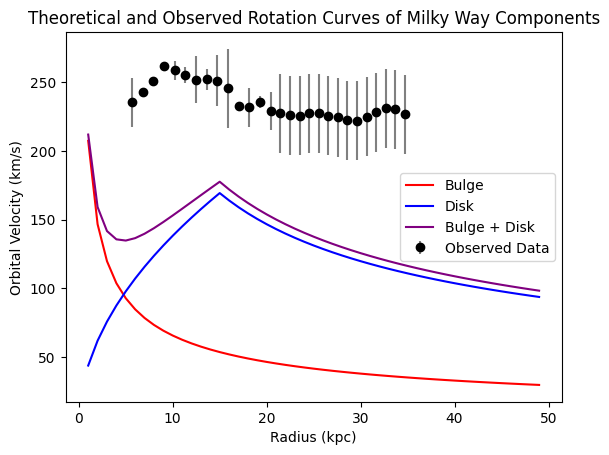

In [6]:
import astropy.io.ascii
from google.colab import files
uploaded = files.upload()

def calculate_enclosed_mass_for_disk(R, density=density_disk, R_disk=R_disk):
    return np.pi * np.minimum(R, R_disk)**2 * density


# Read the actual data
data = astropy.io.ascii.read("galaxy_rotation_2006.txt")

# Plot the actual data with error bars
plt.errorbar(data['col2'], data['col3'], yerr=data['col4'], ecolor='gray', color='black', fmt='o', label='Observed Data')

# Theoretical values for bulge, disk, and combined curves
R_arr = np.arange(1, 50) * u.kpc  # Radii array for theoretical calculations
v_bulge = calculate_orbital_velocity(M_bulge, R_arr)
M_disk_arr = calculate_enclosed_mass_for_disk(R_arr)
v_disk = calculate_orbital_velocity(M_disk_arr, R_arr)
v_total = np.sqrt(v_bulge**2 + v_disk**2)  # Total velocity combining bulge and disk

# Plotting theoretical curves
plt.plot(R_arr.to(u.kpc), v_bulge.to(u.km/u.s), color="red", label="Bulge")
plt.plot(R_arr.to(u.kpc), v_disk.to(u.km/u.s), color="blue", label="Disk")
plt.plot(R_arr.to(u.kpc), v_total.to(u.km/u.s), color="purple", label="Bulge + Disk")

# Setup plot details
plt.xlabel('Radius (kpc)')
plt.ylabel('Orbital Velocity (km/s)')
plt.title('Theoretical and Observed Rotation Curves of Milky Way Components')
plt.legend()
plt.show()
